<a href="https://colab.research.google.com/github/JunaidWani96/Prediction-of-Cardiovascular-Disease-using-Deep-Learning-Method/blob/main/stockpredLSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import important Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from sklearn.preprocessing import MinMaxScaler

In [2]:
# Load Dataset
df=pd.read_csv("TSLA.csv")

In [3]:
df.shape

(2416, 7)

In [4]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [5]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.000000,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.420000,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.920000,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.100000,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.000000,15.830000,16.110001,16.110001,6866900
...,...,...,...,...,...,...,...
2411,2020-01-28,568.489990,576.809998,558.080017,566.900024,566.900024,11788500
2412,2020-01-29,575.690002,589.799988,567.429993,580.989990,580.989990,17801500
2413,2020-01-30,632.419983,650.880005,618.000000,640.809998,640.809998,29005700
2414,2020-01-31,640.000000,653.000000,632.520020,650.570007,650.570007,15719300


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2416 non-null   object 
 1   Open       2416 non-null   float64
 2   High       2416 non-null   float64
 3   Low        2416 non-null   float64
 4   Close      2416 non-null   float64
 5   Adj Close  2416 non-null   float64
 6   Volume     2416 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 132.2+ KB


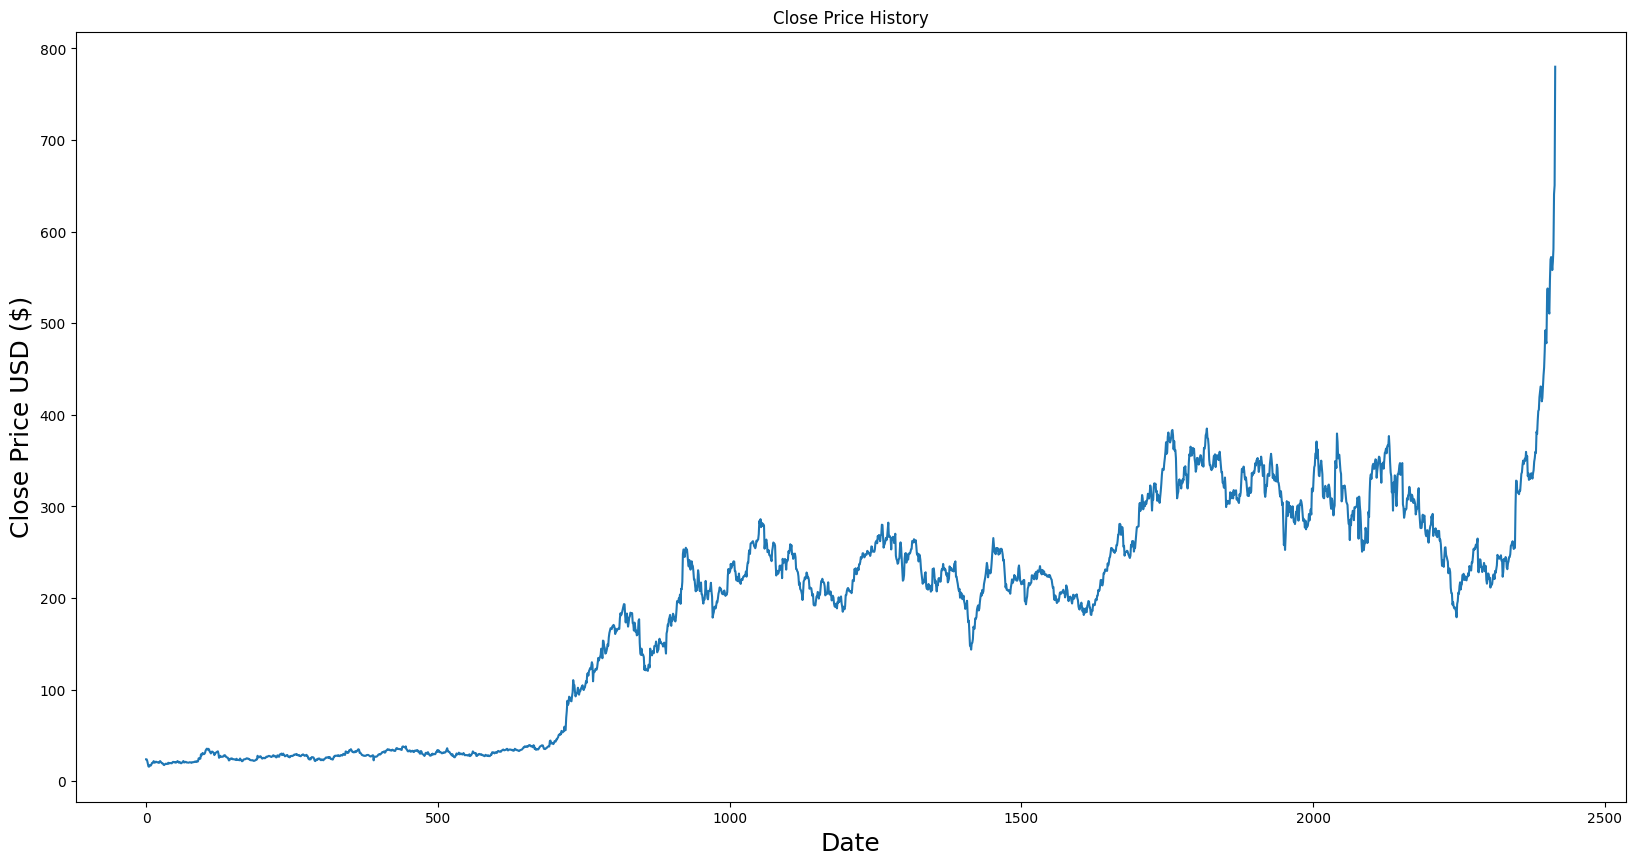

In [7]:
# Ploting the closing price of the stock to visualize the trend
plt.figure(figsize=(20,10))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [8]:
# we need to preprocess the data before feeding it into the LSTM.
data = df.filter(['Close']).values

In [9]:
#we will normalize the data between 0 and 1 using the MinMaxScaler:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data)

In [10]:
# To Train the Dataset
train_data = scaled_data[:int(len(scaled_data)*0.8)]
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [11]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(50))
model.add(Dropout(0.2))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(x_train, y_train, epochs=50, batch_size=32)

Epoch 1/50
59/59 [==============================] - 14s 118ms/step - loss: 0.0043
Epoch 2/50
59/59 [==============================] - 6s 99ms/step - loss: 0.0010
Epoch 3/50
59/59 [==============================] - 7s 118ms/step - loss: 9.5681e-04
Epoch 4/50
59/59 [==============================] - 6s 96ms/step - loss: 8.3590e-04
Epoch 5/50
59/59 [==============================] - 7s 119ms/step - loss: 8.4788e-04
Epoch 6/50
59/59 [==============================] - 6s 95ms/step - loss: 8.3096e-04
Epoch 7/50
59/59 [==============================] - 7s 115ms/step - loss: 6.9539e-04
Epoch 8/50
59/59 [==============================] - 6s 98ms/step - loss: 6.1840e-04
Epoch 9/50
59/59 [==============================] - 6s 109ms/step - loss: 6.0162e-04
Epoch 10/50
59/59 [==============================] - 6s 105ms/step - loss: 6.3238e-04
Epoch 11/50
59/59 [==============================] - 6s 106ms/step - loss: 5.7738e-04
Epoch 12/50
59/59 [==============================] - 6s 105ms/step - loss:

In [12]:
# predictions on the test data
test_data = scaled_data[int(len(scaled_data)*0.8) - 60:]
x_test = []
y_test = data[int(len(data)*0.8):, :]

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

16/16 [==============================] - 2s 39ms/step


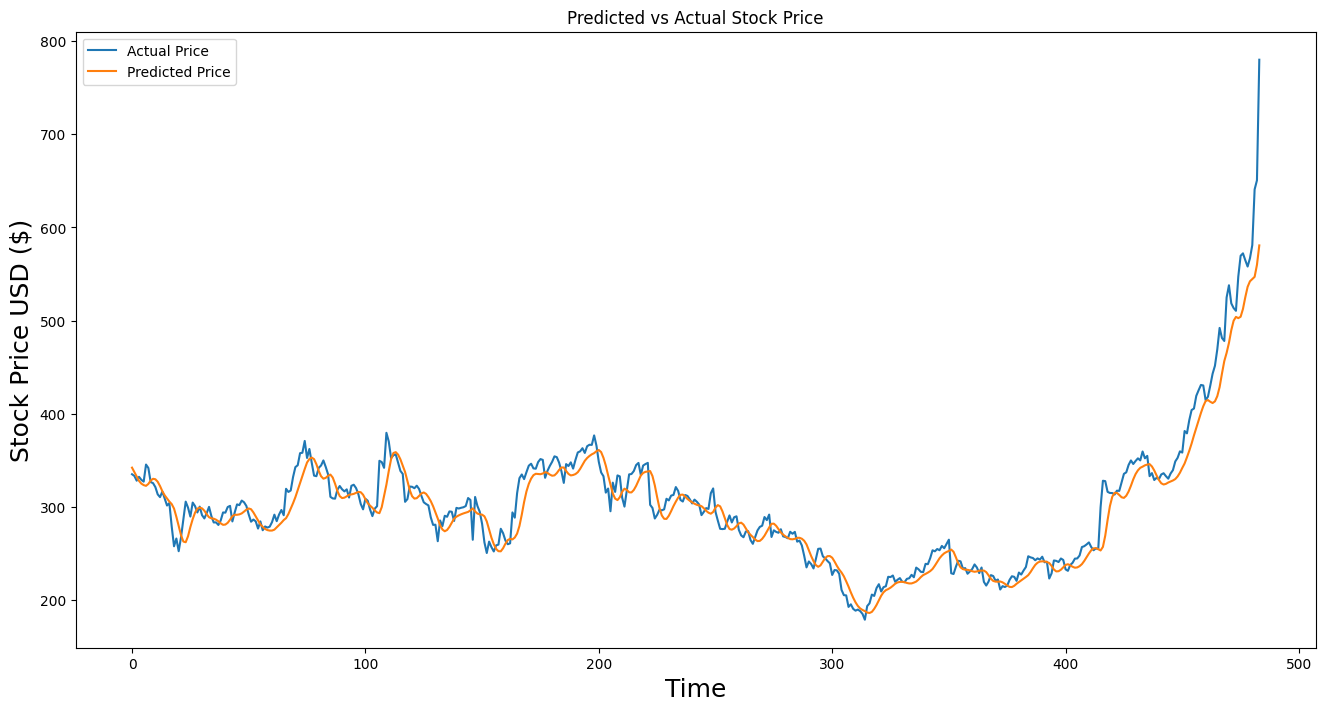

In [13]:
# Visualizing the Predicted price as compared to Actual price
plt.figure(figsize=(16,8))
plt.title('Predicted vs Actual Stock Price')
plt.plot(y_test, label='Actual Price')
plt.plot(predictions, label='Predicted Price')
plt.xlabel('Time', fontsize=18)
plt.ylabel('Stock Price USD ($)', fontsize=18)
plt.legend()
plt.show()